# **Pandas**
Pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

Library documentation: http://pandas.pydata.org/

**General**

In [259]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [260]:
# create a series
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [261]:
# create a data frame
dates = pd.date_range('20130101',periods=6)
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=list('ABCD'))
df


,A,B,C,D
2013-01-01,-0.542775,0.101307,-1.002847,-1.856400
2013-01-02,0.326179,0.294085,1.199722,0.085157
2013-01-03,0.449434,-0.835882,1.282194,0.909496
2013-01-04,0.932658,-0.255913,-0.647177,3.106600
2013-01-05,0.776572,0.665609,-0.589260,-0.130883
2013-01-06,1.267611,2.075137,-0.011525,-0.329246


In [262]:
# another way to create a data frame
df2 = pd.DataFrame(
    { 'A' : 1.,
      'B' : pd.Timestamp('20130102'),
      'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
      'D' : np.array([3] * 4,dtype='int32'),
      'E' : 'foo' })
df2

,A,B,C,D,E
0,1.0,2013-01-02,1.0,3,foo
1,1.0,2013-01-02,1.0,3,foo
2,1.0,2013-01-02,1.0,3,foo
3,1.0,2013-01-02,1.0,3,foo


In [263]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E            object
dtype: object

In [264]:
df.head()

,A,B,C,D
2013-01-01,-0.542775,0.101307,-1.002847,-1.856400
2013-01-02,0.326179,0.294085,1.199722,0.085157
2013-01-03,0.449434,-0.835882,1.282194,0.909496
2013-01-04,0.932658,-0.255913,-0.647177,3.106600
2013-01-05,0.776572,0.665609,-0.589260,-0.130883


In [265]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [266]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [267]:
df.values

array([[-0.5427748 ,  0.10130738, -1.00284681, -1.85640021],
       [ 0.32617939,  0.29408533,  1.19972218,  0.0851574 ],
       [ 0.44943393, -0.83588232,  1.28219362,  0.90949577],
       [ 0.93265826, -0.25591278, -0.64717695,  3.10660003],
       [ 0.77657207,  0.66560922, -0.58925978, -0.13088344],
       [ 1.26761058,  2.07513655, -0.01152483, -0.32924596]])

In [268]:
# quick data summary
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.534947,0.340724,0.038518,0.297454
std,0.627014,0.991323,0.984515,1.644766
min,-0.542775,-0.835882,-1.002847,-1.856400
25%,0.356993,-0.166608,-0.632698,-0.279655
50%,0.613003,0.197696,-0.300392,-0.022863
75%,0.893637,0.572728,0.896910,0.703411
max,1.267611,2.075137,1.282194,3.106600


In [269]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-0.542775,0.326179,0.449434,0.932658,0.776572,1.267611
B,0.101307,0.294085,-0.835882,-0.255913,0.665609,2.075137
C,-1.002847,1.199722,1.282194,-0.647177,-0.589260,-0.011525
D,-1.856400,0.085157,0.909496,3.106600,-0.130883,-0.329246


In [270]:
# axis 0 is index, axis 1 is columns
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-1.856400,-1.002847,0.101307,-0.542775
2013-01-02,0.085157,1.199722,0.294085,0.326179
2013-01-03,0.909496,1.282194,-0.835882,0.449434
2013-01-04,3.106600,-0.647177,-0.255913,0.932658
2013-01-05,-0.130883,-0.589260,0.665609,0.776572
2013-01-06,-0.329246,-0.011525,2.075137,1.267611


In [271]:
# can sort by values too
df.sort_values(by='B')

,A,B,C,D
2013-01-03,0.449434,-0.835882,1.282194,0.909496
2013-01-04,0.932658,-0.255913,-0.647177,3.106600
2013-01-01,-0.542775,0.101307,-1.002847,-1.856400
2013-01-02,0.326179,0.294085,1.199722,0.085157
2013-01-05,0.776572,0.665609,-0.589260,-0.130883
2013-01-06,1.267611,2.075137,-0.011525,-0.329246


# Selection


In [272]:
# select a column (yields a series)
df['A']

2013-01-01   -0.542775
2013-01-02    0.326179
2013-01-03    0.449434
2013-01-04    0.932658
2013-01-05    0.776572
2013-01-06    1.267611
Freq: D, Name: A, dtype: float64

In [273]:
# column names also attached to the object
df.A

2013-01-01   -0.542775
2013-01-02    0.326179
2013-01-03    0.449434
2013-01-04    0.932658
2013-01-05    0.776572
2013-01-06    1.267611
Freq: D, Name: A, dtype: float64

In [274]:
# slicing works
df[0:3]

,A,B,C,D
2013-01-01,-0.542775,0.101307,-1.002847,-1.856400
2013-01-02,0.326179,0.294085,1.199722,0.085157
2013-01-03,0.449434,-0.835882,1.282194,0.909496


In [275]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,0.326179,0.294085,1.199722,0.085157
2013-01-03,0.449434,-0.835882,1.282194,0.909496
2013-01-04,0.932658,-0.255913,-0.647177,3.106600


In [276]:
# cross-section using a label
df.loc[dates[0]]

A   -0.542775
B    0.101307
C   -1.002847
D   -1.856400
Name: 2013-01-01 00:00:00, dtype: float64

In [277]:
# getting a scalar value
df.loc[dates[0], 'A']

-0.542774797599039

In [278]:
# select via position
df.iloc[3]

A    0.932658
B   -0.255913
C   -0.647177
D    3.106600
Name: 2013-01-04 00:00:00, dtype: float64

In [279]:
df.iloc[3:5,0:2]


,A,B
2013-01-04,0.932658,-0.255913
2013-01-05,0.776572,0.665609


In [280]:
# column slicing
df.iloc[:,1:3]

,B,C
2013-01-01,0.101307,-1.002847
2013-01-02,0.294085,1.199722
2013-01-03,-0.835882,1.282194
2013-01-04,-0.255913,-0.647177
2013-01-05,0.665609,-0.589260
2013-01-06,2.075137,-0.011525


In [281]:
# get a value by index
df.iloc[1,1]

0.29408533101273

In [282]:
# boolean indexing
df[df.A > 0]

,A,B,C,D
2013-01-02,0.326179,0.294085,1.199722,0.085157
2013-01-03,0.449434,-0.835882,1.282194,0.909496
2013-01-04,0.932658,-0.255913,-0.647177,3.106600
2013-01-05,0.776572,0.665609,-0.589260,-0.130883
2013-01-06,1.267611,2.075137,-0.011525,-0.329246


In [283]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,0.101307,NaN,NaN
2013-01-02,0.326179,0.294085,1.199722,0.085157
2013-01-03,0.449434,NaN,1.282194,0.909496
2013-01-04,0.932658,NaN,NaN,3.106600
2013-01-05,0.776572,0.665609,NaN,NaN
2013-01-06,1.267611,2.075137,NaN,NaN


In [284]:
# filtering
df3 = df.copy()
df3['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df3[df3['E'].isin(['two', 'four'])]

,A,B,C,D,E
2013-01-03,0.449434,-0.835882,1.282194,0.909496,two
2013-01-05,0.776572,0.665609,-0.589260,-0.130883,four


In [285]:
# setting examples
df.at[dates[0],'A'] = 0
df.iat[0,1] = 0
df.loc[:, 'D'] = np.array([5] * len(df))
df

<ipython-input-285-f83400d50b8e>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'D'] = np.array([5] * len(df))


,A,B,C,D
2013-01-01,0.000000,0.000000,-1.002847,5
2013-01-02,0.326179,0.294085,1.199722,5
2013-01-03,0.449434,-0.835882,1.282194,5
2013-01-04,0.932658,-0.255913,-0.647177,5
2013-01-05,0.776572,0.665609,-0.589260,5
2013-01-06,1.267611,2.075137,-0.011525,5


In [286]:
# dealing with missing data
df4 = df.reindex(index=dates[0:4],columns=list(df.columns) + ['E'])
df4.loc[dates[0]:dates[1],'E'] = 1
df4

,A,B,C,D,E
2013-01-01,0.000000,0.000000,-1.002847,5,1.0
2013-01-02,0.326179,0.294085,1.199722,5,1.0
2013-01-03,0.449434,-0.835882,1.282194,5,NaN
2013-01-04,0.932658,-0.255913,-0.647177,5,NaN


In [287]:
# drop rows with missing data
df4.dropna(how='any')

,A,B,C,D,E
2013-01-01,0.000000,0.000000,-1.002847,5,1.0
2013-01-02,0.326179,0.294085,1.199722,5,1.0


In [288]:
# fill missing data
df4.fillna(value=5)

,A,B,C,D,E
2013-01-01,0.000000,0.000000,-1.002847,5,1.0
2013-01-02,0.326179,0.294085,1.199722,5,1.0
2013-01-03,0.449434,-0.835882,1.282194,5,5.0
2013-01-04,0.932658,-0.255913,-0.647177,5,5.0


In [289]:
# boolean mask for nan values
pd.isnull(df4)

,A,B,C,D,E
2013-01-01,False,False,False,False,False
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,True
2013-01-04,False,False,False,False,True


# Operations

In [290]:
df.mean()

A    0.625409
B    0.323839
C    0.038518
D    5.000000
dtype: float64

In [291]:
# pivot the mean calculation
df.mean(1)

2013-01-01    0.999288
2013-01-02    1.704997
2013-01-03    1.473936
2013-01-04    1.257392
2013-01-05    1.463230
2013-01-06    2.082806
Freq: D, dtype: float64

In [292]:
# aligning objects with different dimensions
s = pd.Series([1,3,5,np.nan,6,8],index=dates).shift(2)
df.sub(s,axis='index')


,A,B,C,D
2013-01-01,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,-0.550566,-1.835882,0.282194,4.0
2013-01-04,-2.067342,-3.255913,-3.647177,2.0
2013-01-05,-4.223428,-4.334391,-5.589260,0.0
2013-01-06,NaN,NaN,NaN,NaN


In [293]:
# applying functions
df.apply(np.cumsum)

,A,B,C,D
2013-01-01,0.000000,0.000000,-1.002847,5
2013-01-02,0.326179,0.294085,0.196875,10
2013-01-03,0.775613,-0.541797,1.479069,15
2013-01-04,1.708272,-0.797710,0.831892,20
2013-01-05,2.484844,-0.132101,0.242632,25
2013-01-06,3.752454,1.943036,0.231107,30


In [294]:
df.apply(lambda x: x.max() - x.min())

A    1.267611
B    2.911019
C    2.285040
D    0.000000
dtype: float64

In [295]:
# simple count aggregation
s = pd.Series(np.random.randint(0,7,size=10))
s.value_counts()

6    3
3    2
4    2
5    1
2    1
1    1
dtype: int64

# Merging / Grouping / Shaping

In [296]:
# concatenation
df = pd.DataFrame(np.random.randn(10, 4))
pieces = [df[:3], df[3:7], df[7:]]
pd.concat(pieces)

,0,1,2,3
0,-1.444479,0.287473,-1.761572,1.296231
1,0.436194,0.686155,-0.496797,1.658032
2,-1.072048,-1.067843,2.068842,-0.764736
3,1.685206,-0.559838,1.098605,1.170322
4,1.059265,-0.744037,0.051506,-0.180693
5,0.224537,-0.291268,-0.454174,1.639510
6,-0.473240,-0.396228,-1.107730,-0.756763
7,0.873014,2.125936,0.209230,0.119204
8,-0.201529,-1.408627,-0.041516,-1.109165
9,-0.186517,1.077348,0.580525,0.833364


In [297]:
# SQL-style join
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
pd.merge(left, right, on='key')


,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [298]:
# append
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])
s = df.iloc[3]
df.append(s, ignore_index=True)

<ipython-input-298-bf165f310047>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df.append(s, ignore_index=True)


,A,B,C,D
0,-1.318677,-0.379992,-0.281753,0.712115
1,0.076833,-2.098796,0.806978,-0.422222
2,-2.230682,-0.248978,0.359147,-0.515725
3,-0.538608,0.000973,0.206222,-1.617980
4,-0.440025,0.341190,0.597461,0.484937
5,0.092489,-0.897521,-1.350298,1.070958
6,2.215254,-0.874387,0.560024,-0.152991
7,-0.588297,-0.146866,0.240578,0.352101
8,-0.538608,0.000973,0.206222,-1.617980


In [299]:
df = pd.DataFrame(
    { 'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
      'B' : ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
      'C' : np.random.randn(8),
      'D' : np.random.randn(8) })
df


,A,B,C,D
0,foo,one,1.490961,-1.752869
1,bar,one,0.156647,-0.397067
2,foo,two,-0.151688,0.220600
3,bar,three,-0.905551,0.692372
4,foo,two,0.348390,0.168866
5,bar,two,-0.343808,-1.125325
6,foo,one,1.003413,-0.677158
7,foo,three,0.742738,1.191007


In [300]:
# group by
df.groupby('A').sum()

<ipython-input-300-2653f53ed679>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('A').sum()


,C,D
A,,
bar,-1.092713,-0.830020
foo,3.433814,-0.849554


In [301]:
# group by multiple columns
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    0.156647 -0.397067
    three -0.905551  0.692372
    two   -0.343808 -1.125325
foo one    2.494374 -2.430027
    three  0.742738  1.191007
    two    0.196703  0.389466

In [302]:
df = pd.DataFrame(
    { 'A' : ['one', 'one', 'two', 'three'] * 3,
      'B' : ['A', 'B', 'C'] * 4,
      'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
      'D' : np.random.randn(12),
      'E' : np.random.randn(12)} )
df

,A,B,C,D,E
0,one,A,foo,0.478931,-0.433061
1,one,B,foo,1.198017,-0.835167
2,two,C,foo,0.093961,-0.913259
3,three,A,bar,-0.035695,0.760332
4,one,B,bar,0.094174,0.905750
5,one,C,bar,0.941750,-0.598747
6,two,A,foo,1.061501,-0.432330
7,three,B,foo,-0.672123,0.019993
8,one,C,foo,-0.851258,-2.128507
9,one,A,bar,1.453961,0.382469


In [303]:
# pivot table
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  1.453961  0.478931
      B  0.094174  1.198017
      C  0.941750 -0.851258
three A -0.035695       NaN
      B       NaN -0.672123
      C -0.610319       NaN
two   A       NaN  1.061501
      B  1.654651       NaN
      C       NaN  0.093961

# Time Series

In [304]:
# time period resampling
rng = pd.date_range('1/1/2012', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample('5Min').sum()

2012-01-01    24961
Freq: 5T, dtype: int64

In [305]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31   -1.945096
2012-02-29   -1.481359
2012-03-31   -0.102579
2012-04-30    2.065051
2012-05-31    1.731335
Freq: M, dtype: float64

In [306]:
ps = ts.to_period()
ps.to_timestamp()

2012-01-01   -1.945096
2012-02-01   -1.481359
2012-03-01   -0.102579
2012-04-01    2.065051
2012-05-01    1.731335
Freq: MS, dtype: float64

# Plotting

<Axes: >

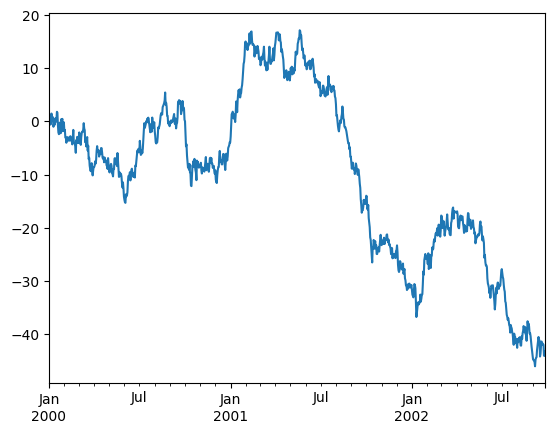

In [307]:
# time series plot
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

<Figure size 640x480 with 0 Axes>

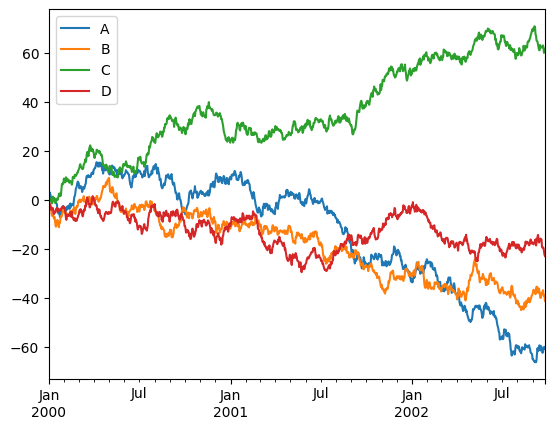

In [308]:
# plot with a data frame
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')